In [4]:
# Losev Ivan 19 IAD
#
# Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone
# Num of Attributes: 9
# Num of Instances 4177
#
# Task: Classification
# Goal: Predict the age of abalone from physical measurements

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
%matplotlib inline

import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
df  = pd.read_csv(os.getcwd() + '\\abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
numerical_data = df.drop(['Sex', 'Rings'], axis=1)
numerical_data = (numerical_data - numerical_data.mean(axis = 0))/numerical_data.std(axis = 0)
                               
                               
clear_df = pd.concat([pd.get_dummies(df['Sex']), numerical_data, df['Rings']], axis=1)
clear_df.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,15
1,0,0,1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,7
2,1,0,0,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,9
3,0,0,1,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,10
4,0,1,0,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,7


In [22]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


X = df2.drop(['Rings', 'I', 'M', 'F', 'Length'], axis=1)
y = df2['Rings']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
split_data = (X_train, X_test, y_train, y_test)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)
RES_MAP={}

3341 836


In [ ]:
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def RFClassifier(split_data, n_estimators):
    X_train, X_test, y_train, y_test = split_data
    
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=4, random_state=42, warm_start=True,
                                oob_score=True, n_jobs=4,criterion="entropy", verbose=1)
    rf.fit(X_train, y_train)

    name = f'RF_n_est_{n_estimators}'
    RES_MAP[name] = {}
    RES_MAP[name]['train_e'] = err_train = round(1 - rf.score(X_train, y_train), 4)
    RES_MAP[name]['test_e']  = err_test  = round(np.mean(y_test  != rf.predict(X_test)), 4)
    RES_MAP[name]['oob_e']   = err_oob   = round(rf.oob_score_, 4)
    RES_MAP[name]['predict'] = rf.predict(X_test)

    print(f'RandomForestClassifier n({n_estimators:>5}) errs: train {err_train}; test {err_test}; oob {err_oob}')
    RES_MAP[name]['stat'] = f'RandomForestClassifier n({n_estimators:>5}) errs: train {err_train}; test {err_test}; oob {err_oob}'


def GBClassifier(split_data, n_estimators):
    X_train, X_test, y_train, y_test = split_data
    
    gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=4, random_state=42, warm_start=True,
                                subsample=0.9, verbose=1)
    gb.fit(X_train, y_train)

    name = f'GB_n_est_{n_estimators}'
    RES_MAP[name] = {}
    RES_MAP[name]['train_e'] = err_train = round(1 - gb.score(X_train, y_train), 4)
    RES_MAP[name]['test_e']  = err_test  = round(np.mean(y_test  != gb.predict(X_test)), 4)
    RES_MAP[name]['predict'] = gb.predict(X_test)

    print(f'GradientBoostingClassifier n({n_estimators:>5}) errs: train {err_train}; test {err_test}')
    RES_MAP[name]['stat'] = f'GradientBoostingClassifier n({n_estimators:>5}) errs: train {err_train}; test {err_test}'

In [48]:
ranges =  chain(range(20, 300, 20), range(300, 1000, 100), range(1000, 5000, 1000))
for n_estimators in ranges:
    RFClassifier(split_data, n_estimators)
    
for n_estimators in ranges:
    print(RES_MAP[f'RF_n_est_{n_estimators}']['stat'])
    

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RandomForestClassifier n(   20) errs: train 0.2954; test 0.2787; oob 0.7004


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished


RandomForestClassifier n(   40) errs: train 0.2945; test 0.2811; oob 0.6995


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished


RandomForestClassifier n(   60) errs: train 0.2951; test 0.2799; oob 0.6998


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished


RandomForestClassifier n(   80) errs: train 0.2945; test 0.2787; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RandomForestClassifier n(  100) errs: train 0.2945; test 0.2787; oob 0.7025


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.1s finished


RandomForestClassifier n(  120) errs: train 0.2942; test 0.2787; oob 0.7022


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.0s finished


RandomForestClassifier n(  140) errs: train 0.2942; test 0.2787; oob 0.7016


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RandomForestClassifier n(  160) errs: train 0.2939; test 0.2775; oob 0.7007


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RandomForestClassifier n(  180) errs: train 0.2942; test 0.2775; oob 0.7007


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


RandomForestClassifier n(  200) errs: train 0.2942; test 0.2787; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RandomForestClassifier n(  220) errs: train 0.2945; test 0.2787; oob 0.7007


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    0.2s finished


RandomForestClassifier n(  240) errs: train 0.2942; test 0.2787; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.1s finished


RandomForestClassifier n(  260) errs: train 0.2948; test 0.2775; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    0.1s finished


RandomForestClassifier n(  280) errs: train 0.2945; test 0.2775; oob 0.7013


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished


RandomForestClassifier n(  300) errs: train 0.2948; test 0.2775; oob 0.7007


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.2s finished


RandomForestClassifier n(  400) errs: train 0.2942; test 0.2775; oob 0.7004


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


RandomForestClassifier n(  500) errs: train 0.2945; test 0.2775; oob 0.7004


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.3s finished


RandomForestClassifier n(  600) errs: train 0.2939; test 0.2775; oob 0.7016


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.3s finished


RandomForestClassifier n(  700) errs: train 0.2945; test 0.2775; oob 0.7007


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(

RandomForestClassifier n(  800) errs: train 0.2945; test 0.2775; oob 0.7016


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(

RandomForestClassifier n(  900) errs: train 0.2948; test 0.2787; oob 0.7013


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Paral

RandomForestClassifier n( 1000) errs: train 0.2945; test 0.2787; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 2000 

RandomForestClassifier n( 2000) errs: train 0.2945; test 0.2775; oob 0.7013


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1792 

RandomForestClassifier n( 3000) errs: train 0.2948; test 0.2775; oob 0.701


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed:    7.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1242 

RandomForestClassifier n( 4000) errs: train 0.2948; test 0.2775; oob 0.701


[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed:    2.2s finished


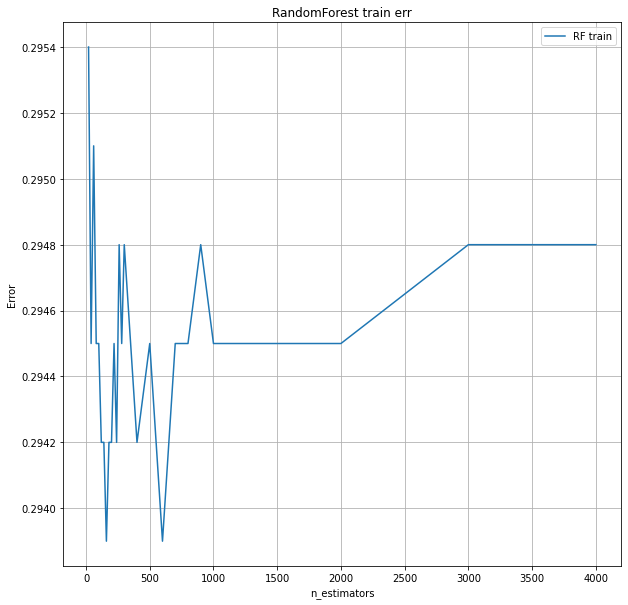

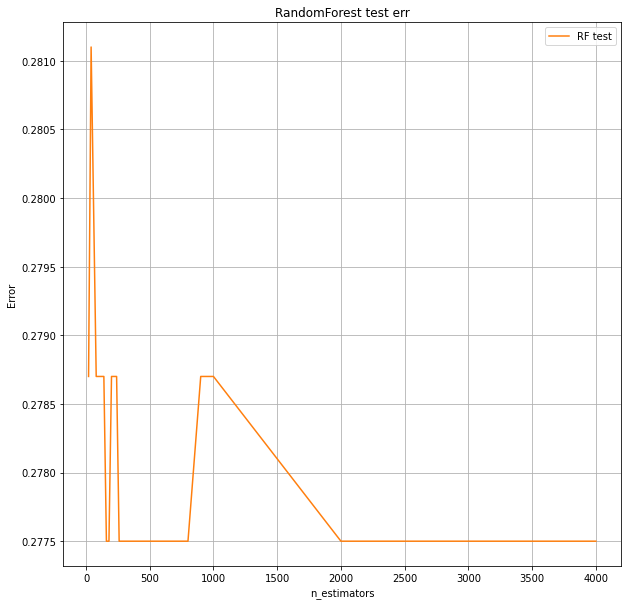

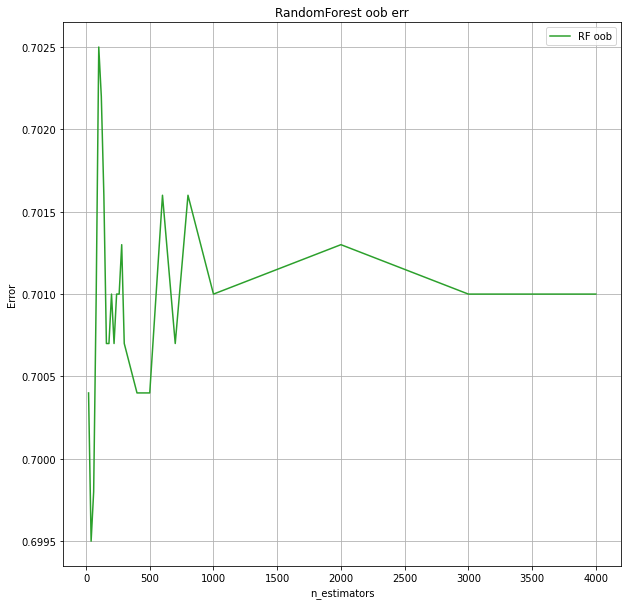

In [114]:
def PlotErr(classifier_name, field_name, label, color, title):
    fig, ax = plt.subplots(figsize=(10,10))
    
    x_plt = []
    y_plt = []
    ranges = chain(range(20, 300, 20), range(300, 1000, 100), range(1000, 5000, 1000))
    for n_estimators in ranges:
        x_plt.append(n_estimators)
        y_plt.append(RES_MAP[f'{classifier_name}_n_est_{n_estimators}'][field_name])


    ax.plot(x_plt, y_plt, label=label, color=color)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_title(title)
    ax.legend(loc='best')
    plt.grid(True)
    plt.show()


PlotErr(classifier_name='RF', field_name='train_e', label='RF train', color='C0', title='RandomForest train err')
PlotErr(classifier_name='RF', field_name='test_e', label='RF test', color='C1', title='RandomForest test err')
PlotErr(classifier_name='RF', field_name='oob_e', label='RF oob', color='C2', title='RandomForest oob err')

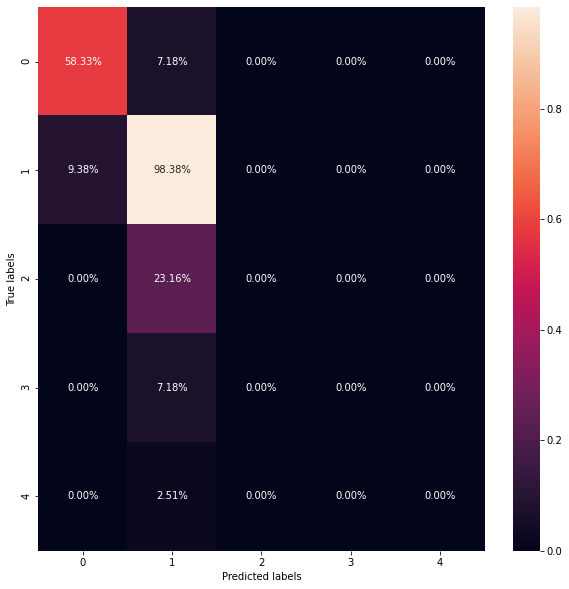

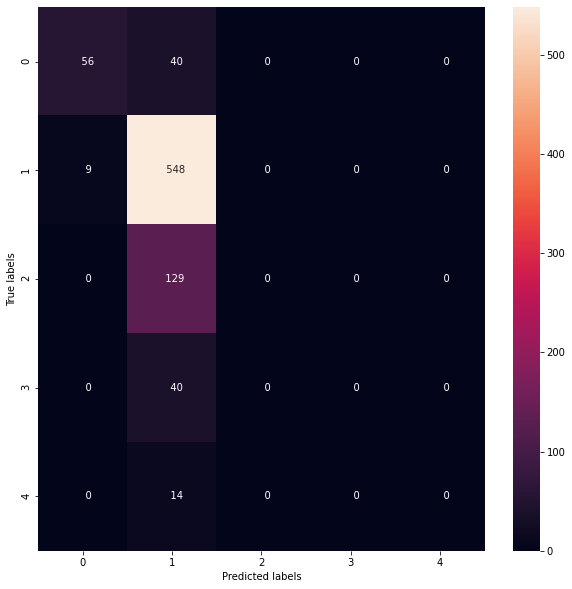

              precision    recall  f1-score   support

           0       0.86      0.58      0.70        96
           1       0.71      0.98      0.83       557
           2       0.00      0.00      0.00       129
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        14

    accuracy                           0.72       836
   macro avg       0.31      0.31      0.30       836
weighted avg       0.57      0.72      0.63       836



C:\Users\ilosev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
y_pred = RES_MAP[f'RF_n_est_{500}']['predict']
cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True, fmt='.2%')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cnf_matrix, annot=True, fmt='5')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

print(classification_report(y_test, y_pred))

In [107]:
ranges =  chain(range(20, 300, 20), range(300, 1000, 100), range(1000, 5000, 1000))
for n_estimators in ranges:
    GBClassifier(split_data, n_estimators)
    
for n_estimators in ranges:
    print(RES_MAP[f'GB_n_est_{n_estimators}']['stat'])
    

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2770.1244          21.0952            0.61s
         2        2556.2749          14.8130            0.62s
         3        2477.4543          10.6339            0.60s
         4        2376.1066           6.5939            0.56s
         5        2264.5693           5.3595            0.52s
         6        2198.2121           5.3673            0.49s
         7        2148.8813           4.1732            0.45s
         8        2094.2918           2.5636            0.42s
         9        2048.5627           2.7145            0.38s
        10        2015.1196           1.8470            0.34s
        20        1745.1956           0.5640            0.00s
GradientBoostingClassifier n(   20) errs: train 0.2209; test 0.2596
      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2770.1244          21.0952            1.33s
         2        2556.2749          14.8130            1.33s


         5        2264.5693           5.3595            5.91s
         6        2198.2121           5.3673            6.15s
         7        2148.8813           4.1732            6.06s
         8        2094.2918           2.5636            5.89s
         9        2048.5627           2.7145            5.78s
        10        2015.1196           1.8470            5.79s
        20        1745.1956           0.5640            5.35s
        30        1579.9353          -0.5865            4.96s
        40        1476.8004          -0.3817            4.57s
        50        1378.9928          -0.5498            4.10s
        60        1269.6241          -0.9065            3.64s
        70        1212.5895          -0.6833            3.23s
        80        1130.0153          -0.3456            2.84s
        90        1083.0321          -0.2459            2.47s
       100        1010.2010          -0.5775            2.11s
GradientBoostingClassifier n(  160) errs: train 0.0652; test 0.2787
  

         7        2148.8813           4.1732            8.93s
         8        2094.2918           2.5636            8.98s
         9        2048.5627           2.7145            9.04s
        10        2015.1196           1.8470            8.99s
        20        1745.1956           0.5640            8.59s
        30        1579.9353          -0.5865            8.00s
        40        1476.8004          -0.3817            7.76s
        50        1378.9928          -0.5498            7.46s
        60        1269.6241          -0.9065            7.17s
        70        1212.5895          -0.6833            6.85s
        80        1130.0153          -0.3456            6.38s
        90        1083.0321          -0.2459            6.09s
       100        1010.2010          -0.5775            5.80s
       200         624.8499          -0.3497            2.62s
GradientBoostingClassifier n(  280) errs: train 0.021; test 0.2799
      Iter       Train Loss      OOB Improve   Remaining Time 
  

       100        1010.2010          -0.5775           20.70s
       200         624.8499          -0.3497           16.30s
       300         406.0033          -0.2531           12.71s
       400         268.5111          -0.1223            9.22s
       500         183.0449          -0.2006            6.10s
       600         129.7917          -0.0716            3.09s
       700          95.0444          -0.0436            0.00s
GradientBoostingClassifier n(  700) errs: train 0.0; test 0.2811
      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2770.1244          21.0952           17.58s
         2        2556.2749          14.8130           21.57s
         3        2477.4543          10.6339           24.97s
         4        2376.1066           6.5939           27.26s
         5        2264.5693           5.3595           27.67s
         6        2198.2121           5.3673           28.80s
         7        2148.8813           4.1732           29.42s
    

         6        2198.2121           5.3673            1.68m
         7        2148.8813           4.1732            1.69m
         8        2094.2918           2.5636            1.71m
         9        2048.5627           2.7145            1.71m
        10        2015.1196           1.8470            1.71m
        20        1745.1956           0.5640            1.65m
        30        1579.9353          -0.5865            1.63m
        40        1476.8004          -0.3817            1.60m
        50        1378.9928          -0.5498            1.55m
        60        1269.6241          -0.9065            1.53m
        70        1212.5895          -0.6833            1.52m
        80        1130.0153          -0.3456            1.50m
        90        1083.0321          -0.2459            1.48m
       100        1010.2010          -0.5775            1.47m
       200         624.8499          -0.3497            1.45m
       300         406.0033          -0.2531            1.41m
       4

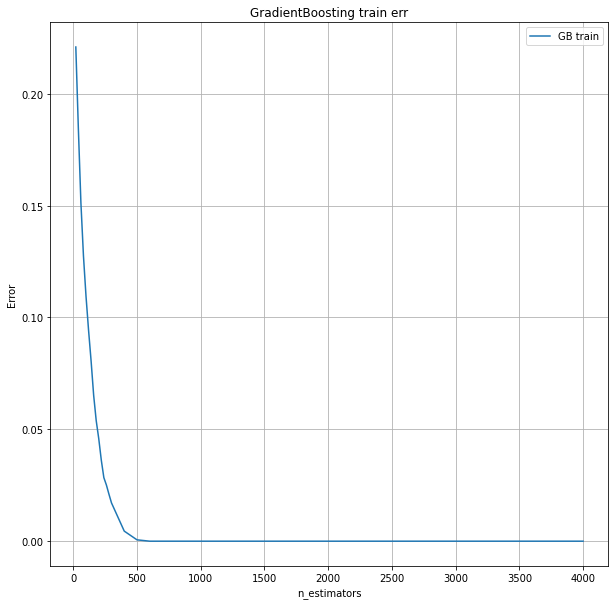

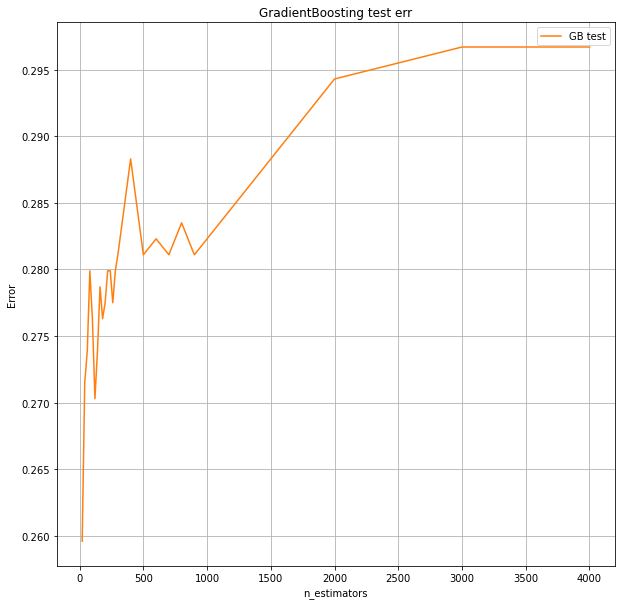

In [115]:
PlotErr(classifier_name='GB', field_name='train_e', label='GB train', color='C0', title='GradientBoosting train err')
PlotErr(classifier_name='GB', field_name='test_e', label='GB test', color='C1', title='GradientBoosting test err')

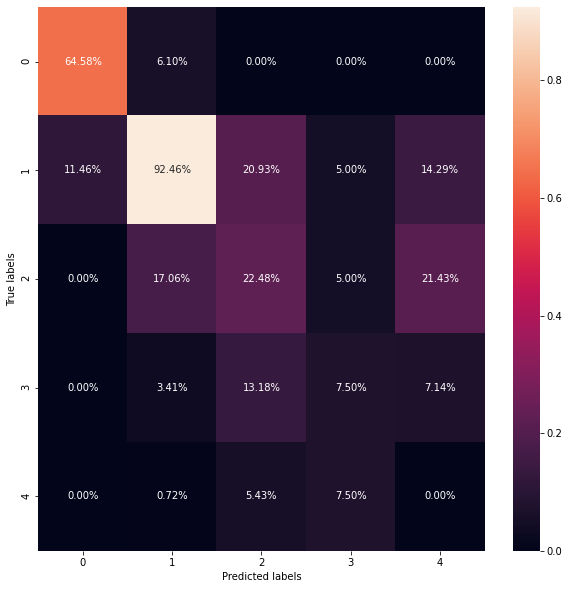

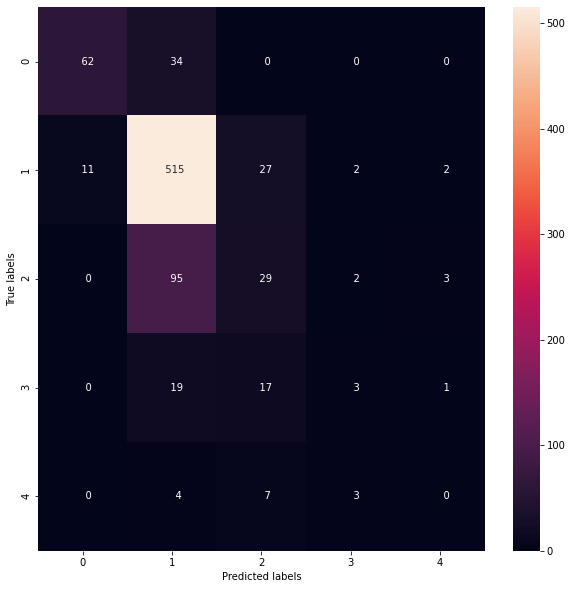

In [118]:
y_pred = RES_MAP[f'GB_n_est_{40}']['predict']
cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True, fmt='.2%')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cnf_matrix, annot=True, fmt='5')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [123]:

print('Random Forest\n', classification_report(y_test, RES_MAP[f'RF_n_est_{500}']['predict']))
print('\n', '#'*40, '\n')
print('Gradient Boosting\n', classification_report(y_test, RES_MAP[f'GB_n_est_{20}']['predict']))

Random Forest
               precision    recall  f1-score   support

           0       0.86      0.58      0.70        96
           1       0.71      0.98      0.83       557
           2       0.00      0.00      0.00       129
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        14

    accuracy                           0.72       836
   macro avg       0.31      0.31      0.30       836
weighted avg       0.57      0.72      0.63       836


 ######################################## 

Gradient Boosting
               precision    recall  f1-score   support

           0       0.87      0.64      0.73        96
           1       0.77      0.95      0.85       557
           2       0.40      0.19      0.26       129
           3       0.30      0.07      0.12        40
           4       0.00      0.00      0.00        14

    accuracy                           0.74       836
   macro avg       0.47      0.37      0.39       83

На выбранных данных Random Forest показывает практически одинаковые результаты при использовании разного числа деревьев.

Лучший результат удаётся получить при n_estimators=500, Error = 0.2775

Gradient Boosting показывает лучший результат уже при  n_estimators=20, Error = 0.2596

При увеличении количества деревьев наблюдается переобучение и результаты на тесте только ухудшаются


Кластеризация

In [144]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MiniBatchKMeans, FeatureAgglomeration, SpectralClustering, MeanShift
from sklearn.model_selection import GridSearchCV

model = KMeans(n_clusters=5)
model.fit(X_train)
pred = model.predict(X_test)

sum(y_test == pred)/len(y_test)

0.11602870813397129

In [147]:
param = {"init":["random", "k-means++"],
         "max_iter":[300,400],
         "tol": [1e-3,1e-4],
         "algorithm": ["auto", "full","elkan"]}
model = KMeans(n_clusters=5)
grid = GridSearchCV(model, param_grid = param, n_jobs=4, verbose=True)
grid.fit(X_train)

pred = grid.predict(X_test)
sum(y_test == pred)/len(y_test)

C:\Users\ilosev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    5.1s finished


0.24880382775119617

In [153]:
model = DBSCAN(eps=1.5, min_samples = 500)
model.fit(X_train)
sum(y_train == model.labels_)/len(y_train)

0.10475905417539659

In [157]:
model = AffinityPropagation()
model.fit(X_train)
pred = model.predict(X_test)
sum(y_test == pred)/len(y_test)

0.0011961722488038277

In [158]:
model = SpectralClustering(n_clusters=5)
model.fit(X_train)
sum(y_train == model.labels_)/len(y_train)

C:\Users\ilosev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  n_init=n_init)


0.17090691409757558

Кластеризация показала ужасные результаты